In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sodapy import Socrata

In [2]:
client = Socrata("data.cityofnewyork.us", None)
results = client.get_all("8vv7-7wx3")

emc_df = pd.DataFrame.from_records(results)
emc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16950 entries, 0 to 16949
Data columns (total 5 columns):
date_and_time         16950 non-null object
email_body            16422 non-null object
notification_title    16950 non-null object
notificationtype      16950 non-null object
record_id             16950 non-null object
dtypes: object(5)
memory usage: 662.2+ KB


In [3]:
# emc_df.drop(columns = ['email_body'], axis = 1, inplace=True)
emc_df["email_body"]=emc_df["email_body"].apply(lambda x: np.NaN if x== "[blank]" else x)
emc_df = emc_df.dropna()
emc_df.duplicated(keep = "first")
emc_df['notificationtype'] = emc_df['notificationtype'].astype('category')
emc_df['date_and_time'] = pd.to_datetime(emc_df['date_and_time'])
emc_df['date_and_time'] = emc_df['date_and_time'].dt.date

In [5]:
import datetime
import time
start1='2019-01-01'
end1='2019-04-30'
start_date1=datetime.date(*map(int,start1.split('-')))
end_date1=datetime.date(*map(int,end1.split('-')))

start2='2020-01-01'
end2='2020-05-07'
start_date2=datetime.date(*map(int,start2.split('-')))
end_date2=datetime.date(*map(int,end2.split('-')))

df_19 = emc_df[emc_df['date_and_time'].apply(lambda x: x > start_date1 and x < end_date1)]
df_20 = emc_df[emc_df['date_and_time'].apply(lambda x: x > start_date2 and x < end_date2)]

In [6]:
counts_19 = df_19.groupby(['notificationtype'])['record_id'].count().reset_index(name='total_count')
counts_20 = df_20.groupby(['notificationtype'])['record_id'].count().reset_index(name='total_count')

In [7]:
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

In [8]:
counts_19 = counts_19.loc[lambda counts_20: counts_20['total_count'] > 0]
counts_20 = counts_20.loc[lambda counts_20: counts_20['total_count'] > 0]
counts_19.rename(columns={'total_count':'total_count_19'}, inplace=True)
counts_20.rename(columns={'total_count':'total_count_20'}, inplace=True)
print(counts_19)

              notificationtype  total_count_19
0            Aerial (Fly-Over)               4
1           Drills / Exercises               6
2                Environmental              40
3                         Fire              36
5      Mass Transit Disruption             111
6     Mass Transit Restoration              85
7                Missing Adult              59
8   Missing Child / Adolescent              12
9                      Parking               3
10            Public Awareness              41
12                Road Closure             395
13         School Notification               8
15                     Utility              40
16                     Weather              60


/Users/yuexi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


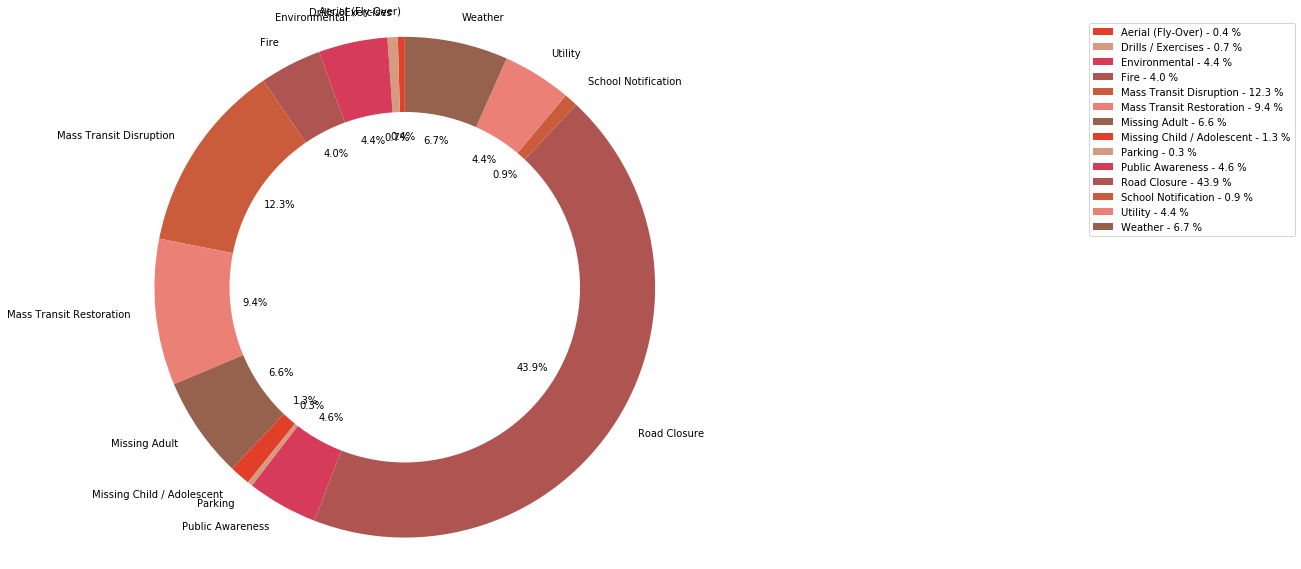

In [10]:
fig1, ax1 = plt.subplots()
ax1.pie(# using data total)arrests
    counts_19['total_count_19'],
    # with the labels being officer names
    labels=counts_19['notificationtype'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
)

label_19 = counts_19['notificationtype']
percentages_19 = counts_19['total_count_19']
percent_19 = 100.*percentages_19/percentages_19.sum()
labels_19 = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(label_19, percent_19)]

plt.legend(labels_19, loc='upper right', bbox_to_anchor=(2.1, 1))
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.set_size_inches(10,10)

fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.tight_layout()
plt.show()

/Users/yuexi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


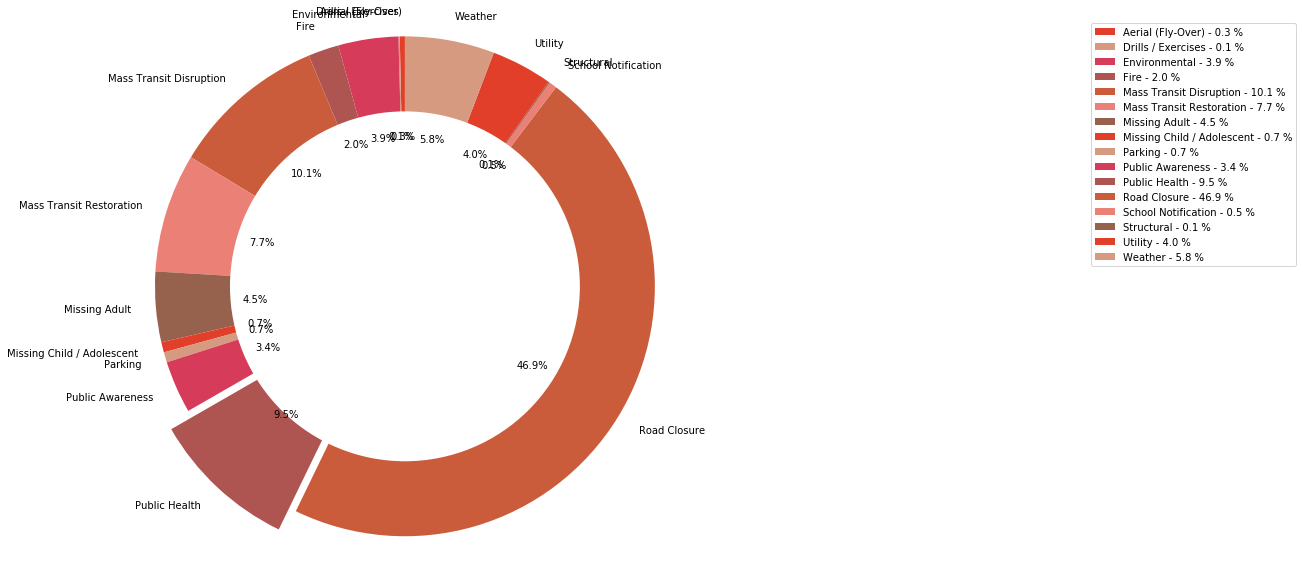

In [9]:
fig1, ax1 = plt.subplots()
ax1.pie(
    counts_20['total_count_20'],
    labels=counts_20['notificationtype'],
    shadow=False,
    colors=colors,
    explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0),
    startangle=90,
    autopct='%1.1f%%',
)

label_20 = counts_20['notificationtype']
percentages_20 = counts_20['total_count_20']
percent_20 = 100.*percentages_20/percentages_20.sum()
labels_20 = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(label_20, percent_20)]

plt.legend(labels_20, loc='upper right', bbox_to_anchor=(2.1, 1))

centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.set_size_inches(10,10)

fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.tight_layout()
plt.show()

In [17]:
start_time='2020-02-28'
start_date=datetime.date(*map(int,start_time.split('-')))
df_start = emc_df[emc_df['date_and_time'].apply(lambda x: x > start_date)]

Covid-related in all types of notification, show the proportion.

In [13]:
words_list = ['COVID19','COVID-19','Coronavirus','COVID']
covid_all = df_start[df_start['notification_title'].str.contains('|'.join(words_list))]
covid_all.loc[:,'notificationtype'].value_counts()
counts_covid = covid_all.groupby(['notificationtype'])['record_id'].count().reset_index(name='covid_count')
counts_covid = counts_covid.loc[lambda counts_covid: counts_covid['covid_count'] > 0]

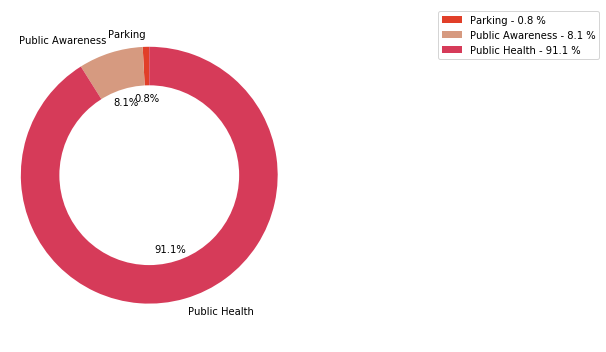

In [16]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
ax1.pie(
    counts_covid['covid_count'],
    labels=counts_covid['notificationtype'],
    shadow=False,
    colors=colors,
    explode=(0, 0, 0),
    startangle=90,
    autopct='%1.1f%%',
)

label_covid = counts_covid['notificationtype']
percentages_covid = counts_covid['covid_count']
percentages_covid = 100.*percentages_covid/percentages_covid.sum()
label_covid = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(label_covid, percentages_covid)]

plt.legend(label_covid, loc='upper right', bbox_to_anchor=(2.1, 1))

centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()

fig.subplots_adjust(0.9,0,1,1)
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.tight_layout()
plt.show()